In [2]:
import  torch

import torchvision.transforms as transforms

In [4]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [12]:
train_tfms = transforms.Compose([transforms.Resize((64, 64)),                     
    transforms.RandomAffine(degrees=40, shear=10, scale=(0.9, 1.1)),  
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

test_tfms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [13]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [14]:
base_dir = r"C:\Users\ASUS\Desktop\archive2"

In [15]:
train_dir = base_dir + r"\train"

test_dir = base_dir + r"\test"

In [16]:
train_set = ImageFolder(train_dir , transform=train_tfms)

test_set = ImageFolder(test_dir , transform= test_tfms)

In [18]:
train_set

Dataset ImageFolder
    Number of datapoints: 19978
    Root location: C:\Users\ASUS\Desktop\archive2\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomAffine(degrees=[-40.0, 40.0], scale=(0.9, 1.1), shear=[-10.0, 10.0])
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [19]:
train_loader = DataLoader(train_set , batch_size=32, shuffle=True ,num_workers=0)

test_loader = DataLoader(test_set ,batch_size=32 , shuffle=False , num_workers=0)

In [22]:
train_set.classes

['cats', 'dogs']

In [25]:
import torch.nn as nn

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3 , 32 ,3)
        self.conv2 = nn.Conv2d(32 , 32 , 3)
        self.pool = nn.MaxPool2d((2,2))
        self.fc1 = nn.Linear(32*30*30 ,128)
        self.fc2 = nn.Linear(128,1)


    def forward(self ,x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))

        x= torch.flatten(x ,1)

        x = F.relu(self.fc1(x))

        x = self.fc2(x)
        return x
net = Net()
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net.to(device)
print(net)        

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=28800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [38]:
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=28800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [39]:
loss_func = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001 )

In [40]:
epochs = 4

for epoch in range(epochs):

    print(f'Strating Epoch: {epoch+1}')
    net.train()
    running_loss=0.0

    for  images , labels in train_loader:
        images ,labels = images, labels
        images = images.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()

        output=net(images)
        loss = loss_func(output , labels)
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()

        

Strating Epoch: 1


C:\Users\ASUS\anaconda3\envs\torchcv\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Strating Epoch: 2
Strating Epoch: 3
Strating Epoch: 4


In [43]:
from  PIL  import Image

In [60]:
img_path = r"C:\Users\ASUS\Desktop\archive2\test\dogs\10010.jpg"

In [61]:
img = Image.open(img_path)

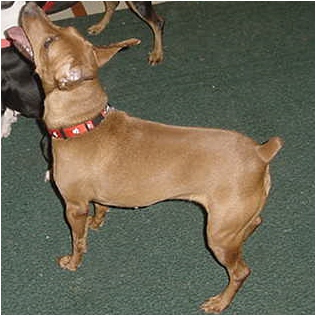

In [62]:
img

In [63]:
v =  test_tfms(img)

In [64]:
v.shape

torch.Size([3, 64, 64])

In [65]:
v=v.unsqueeze(0).to(device)

In [66]:
v.shape

torch.Size([1, 3, 64, 64])

In [72]:

with torch.no_grad():
    logit=net(v)
    prob = torch.sigmoid(logit )

In [73]:
prob

tensor([[0.5738]], device='cuda:0')

In [74]:
pred=1 if prob>0.5 else 0

In [75]:
if pred==1:
    print('dog')
else:
    print('cat')

dog
